# Flight Price Prediction

## Data Description

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.


Size of training set: 10683 records


Size of test set: 2671 records


FEATURES:


Airline: The name of the airline.



Date_of_Journey: The date of the journey



Source: The source from which the service begins.



Destination: The destination where the service ends.



Route: The route taken by the flight to reach the destination.



Dep_Time: The time when the journey starts from the source.



Arrival_Time: Time of arrival at the destination.



Duration: Total duration of the flight.



Total_Stops: Total stops between the source and destination.



Additional_Info: Additional information about the flight



Price: The price of the ticket


Our task is to predict the price of the flight ticket.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')



## Loading the Dataset

In [2]:
df=pd.read_excel("Flightprice_Train.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
#Checking the dimension of the dataset
df.shape

(10683, 11)

In [6]:
#Statistical History
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There is null values in the column route and Total_Stops.

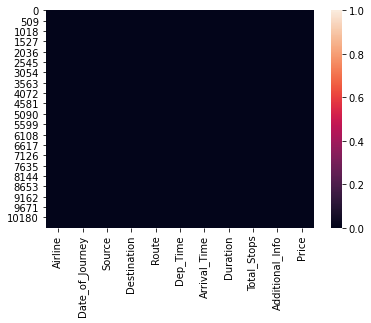

In [8]:
sns.heatmap(df.isnull())

In [9]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [10]:
df['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [11]:
df['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [12]:
df['Price'].value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
9502       1
13875      1
7742       1
5703       1
4098       1
Name: Price, Length: 1870, dtype: int64

## Data Visualization

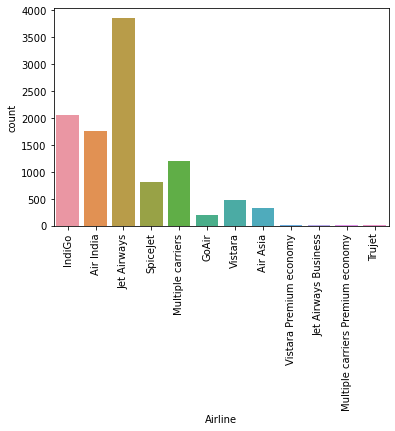

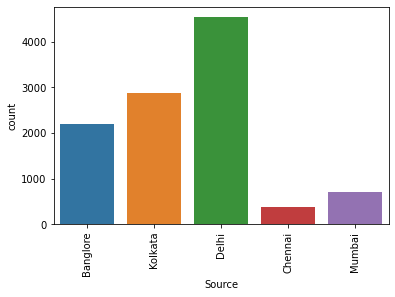

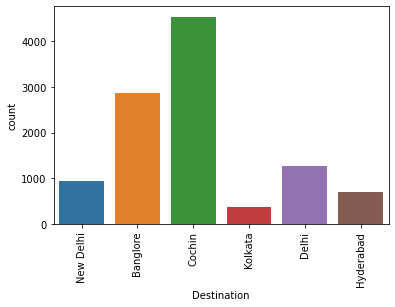

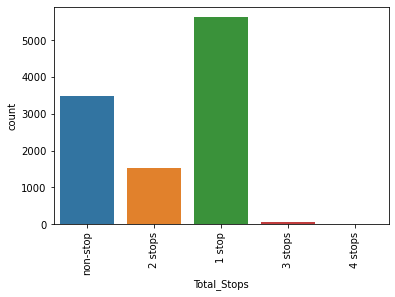

In [13]:
#Univariate Analysis
var1=['Airline','Source','Destination','Total_Stops']
for i in var1:
    plt.xticks(rotation=90)
    sns.countplot(df[i])
    plt.show()

#### obsevations:

* In our dataset "Jet AirWays" comes out most of the time.The  4 airlines coming less in number are Vistara Premium economy,Jet Airways Business,Multiple Carriers premium Economy and Truejet.


* Source of most of the flight service is from "Delhi".Second most flights are from "Kolkata".From Chennai less number of flights are coming.


* Destination of most of the flight service is Cochin.only less number of flight services have Kolkata as destination.


* Most of the flight services have only one stop.Second most Airlines have non-stop services.




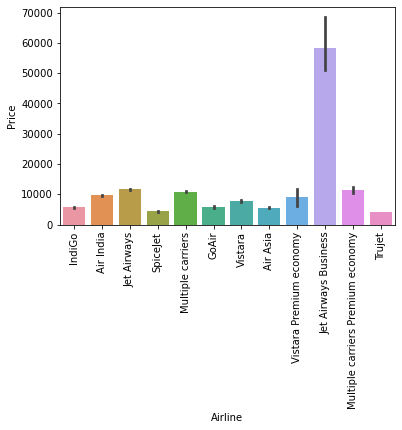

<Figure size 720x720 with 0 Axes>

In [14]:
# Bivariate Analysis
plt.xticks(rotation=90)
sns.barplot(x='Airline',y='Price',data=df)
plt.figure(figsize=(10,10))
plt.show()
    

* Price is high for the airline Jet Airways Business.


* Jet Airways,Multiple Carriers,Multiple carriers premium economy price is above 10000.
 

* Spicejet and Truejet have less price.


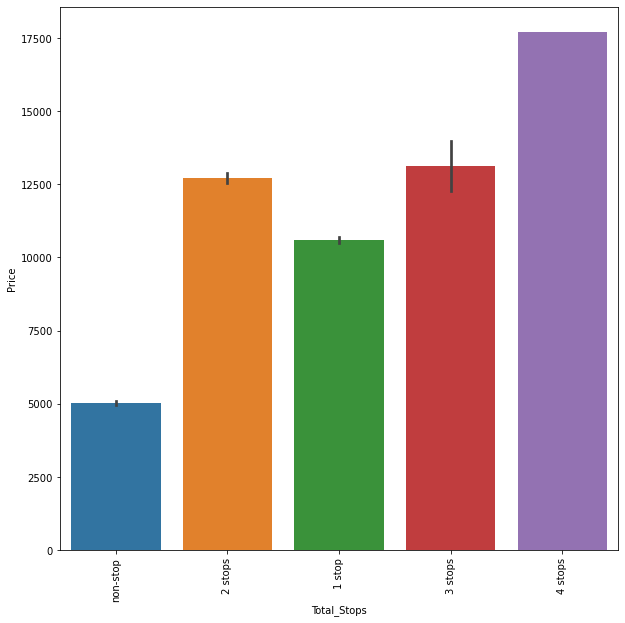

In [15]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(x='Total_Stops',y='Price',data=df)
plt.show()


* From this we can observe that Airlines which have 4 stops have maximum price.

* Also we can observe that price is increasing with the number of stops.

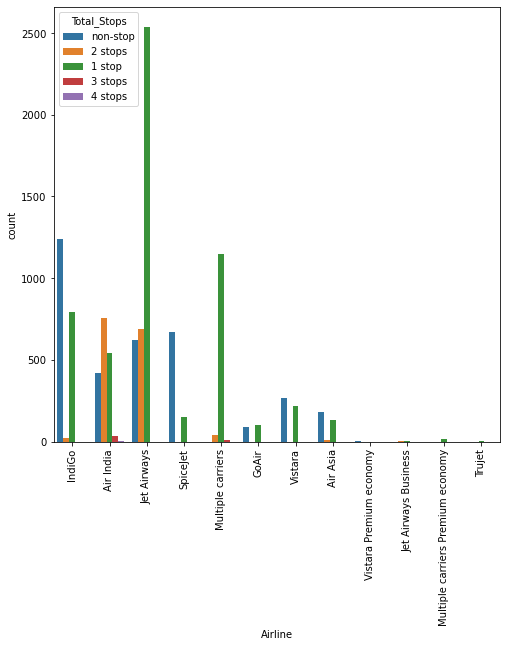

In [16]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x='Airline',hue='Total_Stops',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

* Most of the airlines have non stop and one stop.

* Among all airlines, most of the Jet Airways services have one stop.

From the description we can see that Date_of_Journey is an object data type.Now we have to convert it into timestamp using pandas.to_datetime

In [17]:
import datetime as dt

In [18]:

#Extracting day
df['Journey_Day']=pd.to_datetime(df['Date_of_Journey']).dt.day

#Extracting month
df['Journey_month']=pd.to_datetime(df['Date_of_Journey']).dt.month

In [19]:
#since we have converted Date_of_Journey into integers.we are going to drop this column as it has no use
df.drop('Date_of_Journey',axis=1,inplace=True)

In [20]:
#Similar to Date_of_Journey we can extract values from Dep_time

#Extracting Hours
df['Dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour

#Extracting Minute
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

In [21]:
df.drop('Dep_Time',axis=1,inplace=True)

In [22]:
#Extracting Hour
df['Arrival_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour

#Extracting Minute
df['Arrival_minute']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [23]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [24]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,11,30,14,10


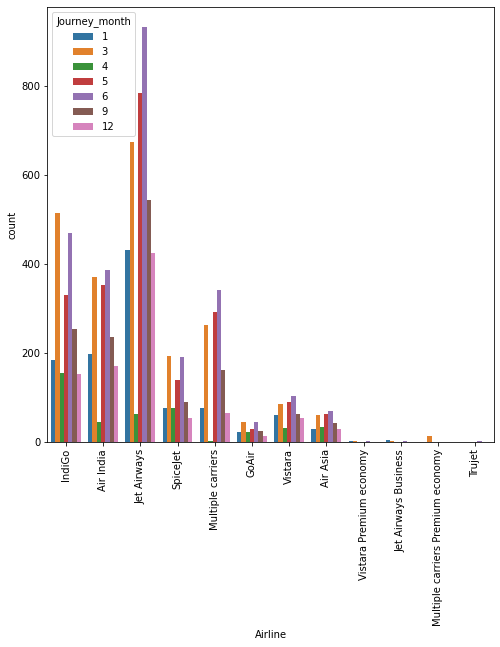

In [25]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x='Airline',hue='Journey_month',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

* From the data it is clear that most of the travelling was done in the month May,March and june.among all airways Jet Airways traveled maximum.


* And second Airline which has done the journey most in the month june,May and March is Indigo.

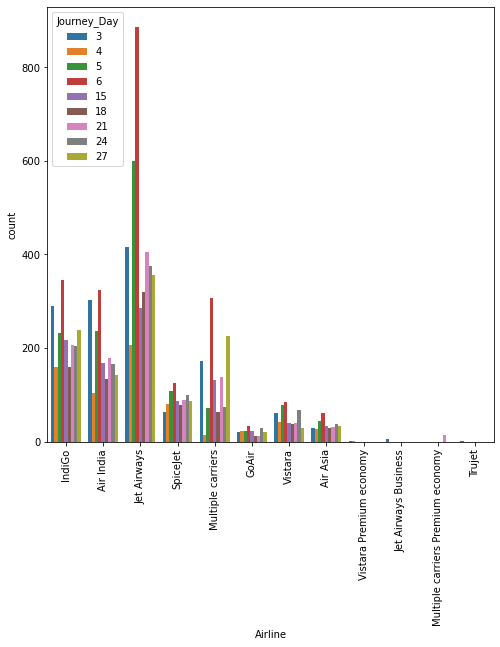

In [26]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x='Airline',hue='Journey_Day',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

* For most of the Airlines flight operation is more in day 6.

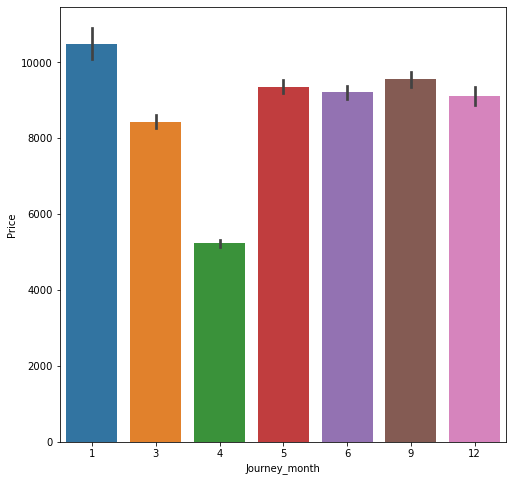

In [27]:
plt.figure(figsize=(8,8))
sns.barplot(x='Journey_month',y='Price',data=df)
plt.show()

* Price is maximum in the month January.

* Price is minimum in the month April.

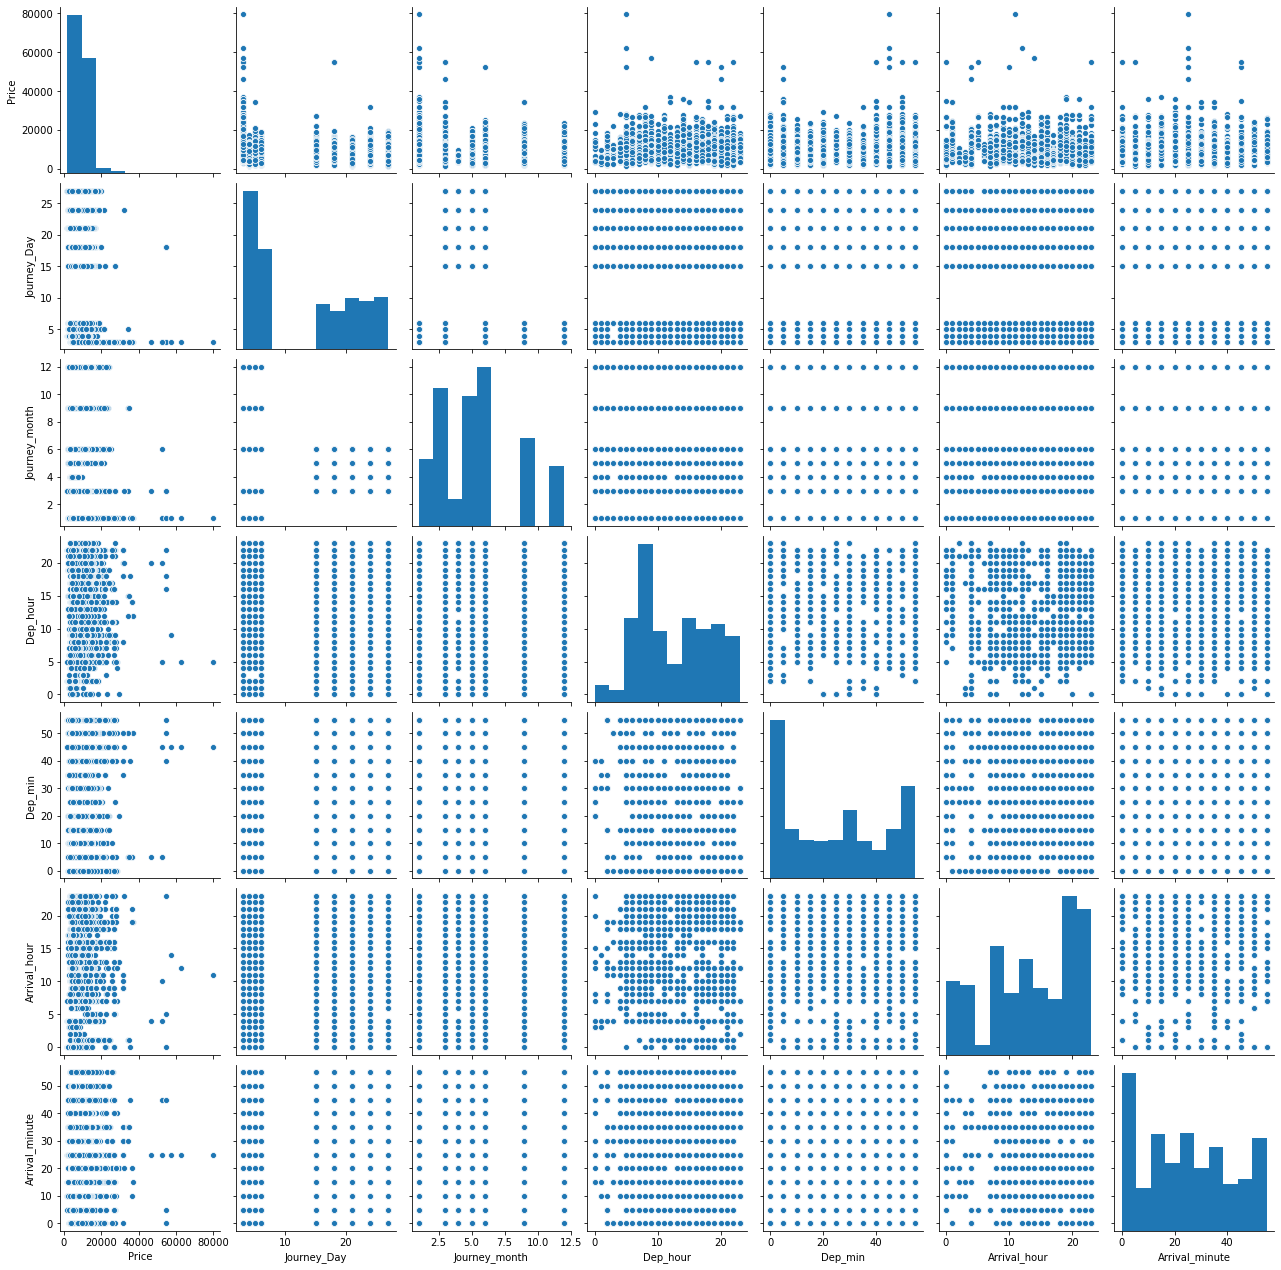

In [28]:
# Multivariate Analysis
sns.pairplot(df)
plt.show()

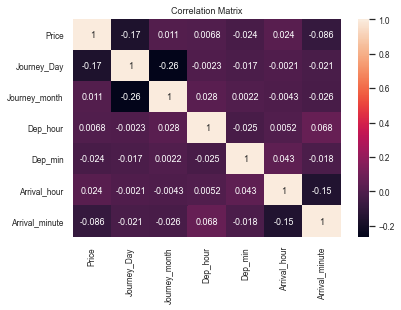

In [29]:
corr_mat=df.corr()
sns.set(font_scale=.75)
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

### Distribution of target variable

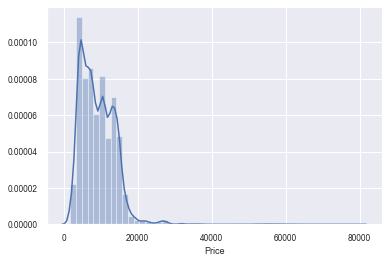

In [30]:
sns.distplot(df['Price'])
plt.show()

Now we are going to replace the NaN values

In [31]:
from sklearn.impute import SimpleImputer

In [32]:
imp=SimpleImputer(strategy='most_frequent')
var=['Route','Total_Stops']
for i in var:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

Now we are going to convert all categorical features into numerical

In [33]:
df=pd.get_dummies(df,columns=['Airline','Source','Destination'],prefix=['Airline','Source','Destination'])

In [34]:
#Converting Categorical to numerical values
stops={'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}
df['Total_Stops']=df['Total_Stops'].map(stops)

In [35]:
df

,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,2h 50m,0,No info,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,5,1,5,50,13,...,0,0,1,0,1,0,0,0,0,0
2,DEL → LKO → BOM → COK,19h,2,No info,13882,6,9,9,25,4,...,0,1,0,0,0,1,0,0,0,0
3,CCU → NAG → BLR,5h 25m,1,No info,6218,5,12,18,5,23,...,0,0,1,0,1,0,0,0,0,0
4,BLR → NAG → DEL,4h 45m,1,No info,13302,3,1,16,50,21,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU → BLR,2h 30m,0,No info,4107,4,9,19,55,22,...,0,0,1,0,1,0,0,0,0,0
10679,CCU → BLR,2h 35m,0,No info,4145,27,4,20,45,23,...,0,0,1,0,1,0,0,0,0,0
10680,BLR → DEL,3h,0,No info,7229,27,4,8,20,11,...,0,0,0,0,0,0,1,0,0,0
10681,BLR → DEL,2h 40m,0,No info,12648,3,1,11,30,14,...,0,0,0,0,0,0,0,0,0,1


Now we are going to drop columns that are not so important for further analysis

In [37]:
df.drop('Airline_Trujet',axis=1,inplace=True)
df.drop('Route',axis=1,inplace=True)
df.drop('Additional_Info',axis=1,inplace=True)
df.drop('Duration',axis=1,inplace=True)

In [38]:
df

,Total_Stops,Price,Journey_Day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Airline_Air Asia,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,0,1,...,0,0,1,0,1,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1,6218,5,12,18,5,23,30,0,0,...,0,0,1,0,1,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,4,9,19,55,22,25,1,0,...,0,0,1,0,1,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,0,1,...,0,0,1,0,1,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,0,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,3,1,11,30,14,10,0,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
#Seperating Independent and Target variable as x and y
x=df.drop('Price',axis=1)
y=df['Price']

## Scaling using StandardScaler

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
ss=StandardScaler()
x=ss.fit_transform(x)

In [42]:
x

array([[-1.22074373,  1.28563248, -0.84850298, ..., -0.26419258,
        -0.19230993,  3.23457051],
       [ 1.74148347, -0.8726517 , -1.5179928 , ..., -0.26419258,
        -0.19230993, -0.30916006],
       [ 1.74148347, -0.7590578 ,  1.15996647, ..., -0.26419258,
        -0.19230993, -0.30916006],
       ...,
       [-1.22074373,  1.62641419, -0.51375808, ..., -0.26419258,
        -0.19230993, -0.30916006],
       [-1.22074373, -1.09983951, -1.5179928 , ..., -0.26419258,
        -0.19230993,  3.23457051],
       [ 1.74148347, -0.8726517 ,  1.15996647, ..., -0.26419258,
        -0.19230993, -0.30916006]])

## Finding the Best random state

In [43]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    rsc=r2_score(y_test,pred_test)
    if rsc>maxAccu:
        maxAccu=rsc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS)        

Best accuracy is 0.6893936999689633 on Random_state 670


## Train-Test-Split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=670)

In [45]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8546, 29), (2137, 29), (8546,), (2137,))

In [46]:
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor(),RandomForestRegressor(),GradientBoostingRegressor()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("For",m,':')
    print('Accuracy Score:',r2_score(y_test,predm))
    print('mse:',mean_squared_error(y_test,predm))
    print('mae:',mean_absolute_error(y_test,predm))
    print('\n')

For LinearRegression() :
Accuracy Score: 0.6893936999689633
mse: 7063919.095207596
mae: 1924.6248570942523


For DecisionTreeRegressor() :
Accuracy Score: 0.7124329543103769
mse: 6539952.167732543
mae: 1323.0583996256432


For SVR() :
Accuracy Score: 0.05260127370325629
mse: 21546079.241773922
mae: 3373.2706791175647


For KNeighborsRegressor() :
Accuracy Score: 0.7600508028646935
mse: 5457010.097201685
mae: 1483.981375760412


For RandomForestRegressor() :
Accuracy Score: 0.8172164549586076
mse: 4156928.478200897
mae: 1125.4682440892311


For GradientBoostingRegressor() :
Accuracy Score: 0.8227812363597264
mse: 4030372.23772512
mae: 1456.7674089695913




## Cross Validation

In [47]:
for m in model:
    
    scr=cross_val_score(m,x,y,cv=5)
    print('For',m,':')
    print('Score',scr)
    print('Cross validation score',scr.mean())
    print('Standard deviation',scr.std())
    print('\n')

For LinearRegression() :
Score [ 5.89389264e-01 -8.55546325e+21  6.17086880e-01  5.96001556e-01
  6.34064561e-01]
Cross validation score -1.711092650388567e+21
Standard deviation 3.4221853007771347e+21


For DecisionTreeRegressor() :
Score [0.67809889 0.72402357 0.75588409 0.70126708 0.60728107]
Cross validation score 0.6933109410723143
Standard deviation 0.05010890180101507


For SVR() :
Score [0.05250906 0.04230519 0.06105908 0.07198823 0.05201134]
Cross validation score 0.05597457959830669
Standard deviation 0.009968533666338606


For KNeighborsRegressor() :
Score [0.72050987 0.75006485 0.74351756 0.7397595  0.74301868]
Cross validation score 0.7393740919351254
Standard deviation 0.01000750693680672


For RandomForestRegressor() :
Score [0.81031985 0.81513746 0.83970891 0.81702233 0.77806137]
Cross validation score 0.8120499833210643
Standard deviation 0.019786320573111058


For GradientBoostingRegressor() :
Score [0.75396276 0.76617677 0.78624893 0.78187528 0.78301954]
Cross valida

#### Since the difference between the r2_score and cross validation score is minimum for RandomForestregressor().This is our best model.

## Regularization

In [48]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':range(0,10)}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)  

{'alpha': 1, 'random_state': 0}


In [49]:
ls=Lasso(alpha=.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.689327898859567

In [50]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
print('cross validation score',cv_mean)

cross validation score 0.6145984406962988


## Hyper parameter Tuning

In [51]:
#Creating parameter list to pass in GridSearchCV
parameters={'criterion':['mse','mae'],'max_features':['auto', 'sqrt', 'log2'],'max_depth':[1,10],'n_estimators':[1,100]}

In [52]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [53]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [1, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 100]})

In [54]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 100}

In [55]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [56]:
r2_score(y_test,GCV_pred)

0.8350692255108056

## Saving the best model

In [57]:
import pickle
filename="Flightpriceprediction.pkl"
pickle.dump(GCV.best_estimator_,open(filename,'wb'))

## Using the test dataset

In [58]:
df1=pd.read_excel('Flightprice_Test.xlsx')
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [60]:
#Statistical Summary
df1.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [61]:
df1.shape

(2671, 10)

In [62]:
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

There is no null values in the test dataset.

In [63]:

#Extracting day
df1['Journey_Day']=pd.to_datetime(df1['Date_of_Journey']).dt.day

#Extracting month
df1['Journey_month']=pd.to_datetime(df1['Date_of_Journey']).dt.month

#since we have converted Date_of_Journey into integers.we are going to drop this column as it has no use
df1.drop('Date_of_Journey',axis=1,inplace=True)



In [64]:
#Similar to Date_of_Journey we can extract values from Dep_time

#Extracting Hours
df1['Dep_hour']=pd.to_datetime(df1['Dep_Time']).dt.hour

#Extracting Minute
df1['Dep_min']=pd.to_datetime(df1['Dep_Time']).dt.minute

df1.drop('Dep_Time',axis=1,inplace=True)
                                                                


In [65]:
#Extracting Hour
df1['Arrival_hour']=pd.to_datetime(df1['Arrival_Time']).dt.hour

#Extracting Minute
df1['Arrival_minute']=pd.to_datetime(df1['Arrival_Time']).dt.minute

df1.drop('Arrival_Time',axis=1,inplace=True)

In [66]:
df1

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1 stop,No info,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,27,3,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,1 stop,No info,3,6,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,1 stop,No info,3,6,4,0,19,15


In [67]:
#Converting Categorical features to Numeric
df1=pd.get_dummies(df1,columns=['Airline','Source','Destination'],prefix=['Airline','Source','Destination'])

stops={'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}
df1['Total_Stops']=df1['Total_Stops'].map(stops)

In [68]:
#Drop the columns which are not so important
df1.drop('Route',axis=1,inplace=True)
df1.drop('Additional_Info',axis=1,inplace=True)
df1.drop('Duration',axis=1,inplace=True)

In [69]:
df1

,Total_Stops,Journey_Day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Airline_Air Asia,Airline_Air India,Airline_GoAir,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,1,5,12,6,20,10,20,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,21,5,19,15,19,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,20,30,20,25,0,1,0,...,0,0,1,0,1,0,0,0,0,0
2667,0,27,3,14,20,16,55,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2668,1,3,6,21,50,4,25,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2669,1,3,6,4,0,19,15,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [70]:
#Scaling
ss=StandardScaler()
df1=ss.fit_transform(df1)

In [71]:
#load the model
fitted_model=pickle.load(open('Flightpriceprediction.pkl','rb'))

In [72]:
fitted_model

RandomForestRegressor(max_depth=10)

In [73]:
#prediction over the test data
predictions=fitted_model.predict(df1)

In [74]:
predictions

array([11690.38446595,  6059.90693191, 13494.3611506 , ...,
       16241.78164458, 13498.81230778,  8483.53429703])

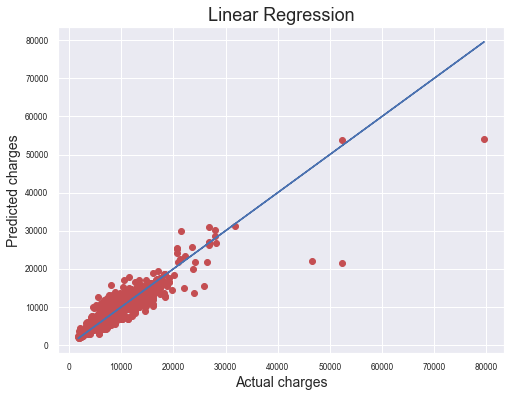

In [75]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=GCV_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()